# Table of Contents
 <p>

In [ ]:
通信路容量$C$は、送信側のシグナルを$X$、受信側のシグナルを$Y$としたときに、$X$と$Y$の相互情報量の$X$についての上限として定義されます。

$$
C:=\rm{sup}_{pX} I(X;Y) \ \ .
$$

2値エントロピー関数を$H(p)$とすると、2元対称通信路の通信路容量は

$$
C=1-H(p) \  \ 
$$

となります。

* $P(Y=0|X=0)=1-p$
* $P(Y=0|X=1)=p$ 
* $P(Y=1|X=0)=p$ 
* $P(Y=0|X=0)=1-p$

$$
I(X;Y) := \sum_X\sum_Y p(X,Y)\log \frac{p(X,Y)}{p(X)p(Y)}
$$

$$
\begin{aligned}
I(X;Y) &= H(Y) - H(Y|X)\\
&= -\sum_Y p(Y) \log p(Y) + \sum_Y p(Y|X) \log p(Y|X) \\
&=  -\sum_Y p(Y) \log p(Y) + \sum_Y \frac{p(Y|X) p(X)}{p(X)}  \log \frac{p(Y|X)p(X)}{p(X)} \\
&=  -\sum_Y p(Y) \log p(Y) + \sum_Y \frac{p(X,Y)}{p(X)}  \log \frac{p(X,Y)}{p(X)} \\
&=  -\sum_Y p(Y) \log p(Y) + \sum_Y \frac{p(X,Y)}{p(X)}  \log \frac{p(X,Y)}{p(X)} \\
\end{aligned}
$$

$H(Y)$が最大値をとるのは、$p(x=0)=1/2$のとき。




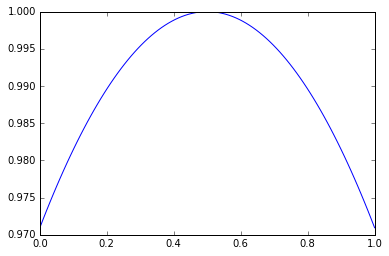

In [23]:
import numpy as np
import matplotlib.pyplot as plt 

def p_cond(x,y,p):
    if x == y:
        return 1-p
    else:
        return p
    
def p_x(x, p_in):
    if x == 0:
        return p_in
    else:
        return 1- p_in
    
    
def p_y(y, p_trans, p_in):
    p = 0
    for x in [0, 1]:
        p = p + p_cond(x, y, p_trans) * p_x(x, p_in)
    return p

def H_y(p_trans, p_in):
    h = 0
    for y in [0, 1]:
        h = h - p_y(y, p_trans, p_in) * np.log2(p_y(y, p_trans, p_in))
    return h

H = H_y(0.1, 0.1)
p_in_range = np.linspace(0, 1, 100)
H_range = np.zeros(p_in_range.size)
for i, p_in in enumerate(p_in_range):
    H_range[i] = H_y(0.4, p_in)
plt.plot(p_in_range, H_range)